In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# list of weight x-axis
weights = [0.9, 1.8, 2.4, 3.5, 3.9, 4.4, 5.1, 5.6, 6.3]
  
# list of size y-axis
sizes = [1.4, 2.6, 1.0, 3.7, 5.5, 3.2, 3.0, 4.9, 6.3]


df_orig = pd.DataFrame(list(zip(weights, sizes)), columns =['weight', 'size'])

In [3]:
def show_coordinates(p_x, p_y, line_label = '', font_color = 'black', font_size = 15):
    annotate_style = dict(size=font_size, color=font_color)
    # Annotation
    for x, y in zip(p_x, p_y):
        x = round(x,1)
        y = round(y,1)
        ax.text(x + 0.03,y + 0.03, f'({x}, {y})', **annotate_style)
    ax.text(x - 0.2, y + 0.1, f'{line_label}', **annotate_style)


In [4]:
def calc_sum_of_squared_residuals(x1, y1, x2, y2):
    return round(((x2 - x1) ** 2 + (y2 - y1) ** 2), 1)

In [5]:
def calc_slope(x1, y1, x2, y2):
    if (x2 - x1) != 0:
        return (y2-y1)/(x2-x1)
    else:
        return 0

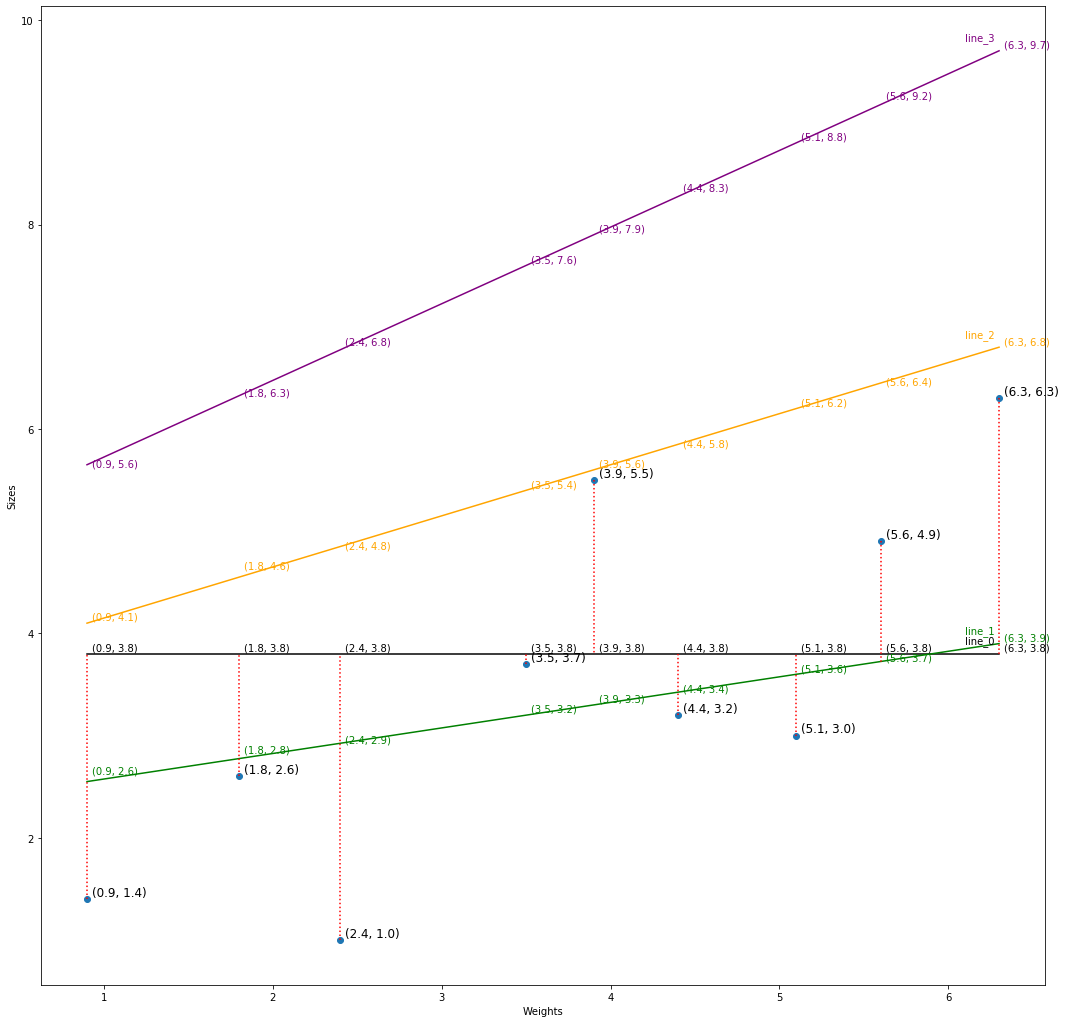

In [7]:
# sections : add scatter >> add lines >> add lsm

fig, ax = plt.subplots(1, 1)

# section 1 : add scatter
plt.rcParams["figure.figsize"] = [18, 18]
ax.set_xlabel('Weights')
ax.set_ylabel('Sizes')
ax.scatter(weights, sizes)
show_coordinates(weights, sizes, font_size = 12)

# section 2 : add lines

total_lines = 4
line_colors = ['black', 'green', 'orange', 'purple'] # keep first black for avg line
slopes = np.linspace(0,1, total_lines + 1)
intercepts = np.linspace(min(sizes), max(sizes), total_lines + 1)

xc_curr_line = np.array(weights)
yc_lines = []
for line, line_color, slope, intercept in zip(range(total_lines), line_colors, slopes, intercepts):
    if line == 0: #  avg line
        avg_wt = round(np.average(weights), 1)
        yc_curr_line = np.array([avg_wt for x in sizes])
        #ax.plot(xc_line0, yc_line0, c = 'black')
    else:
        yc_curr_line = slope * xc_curr_line + intercept
    
    yc_lines.append(list(yc_curr_line))
    ax.plot(xc_curr_line, yc_curr_line, c = line_color, label = 'line' + str(line))
    show_coordinates(xc_curr_line, yc_curr_line, line_label = 'line_' + str(line), font_color=line_color, font_size=10)

#print('\n', yc_lines)

# section 3 : add vertical lines (lsm)

for x, s in zip(weights, sizes):
    lsm_x = []
    lsm_y = []
    
    if s > avg_wt:
        inc_count = -0.1
    else:
        inc_count = 0.1
    
    for y in (np.arange(s, avg_wt + inc_count, inc_count)):
        lsm_x.append(round(x,1))
        lsm_y.append(round(y,1))
    ax.plot(lsm_x, lsm_y, c = "r", ls = ":")

In [8]:
ssr_values = []
prev_ssr = 0

for line_no in range(len(yc_lines)):      
    curr_ssr = 0
    
    for w, s, y2 in zip(weights, sizes, yc_lines[line_no]):
        x1 = w
        y1 = s
        x2 = w
        y2 = round(y2,1)
        curr_ssr = round(curr_ssr + calc_sum_of_squared_residuals(x1, y1, x2, y2),1)
        #print(curr_ssr)
        
    if prev_ssr > curr_ssr or prev_ssr == 0:
        least_ssr_line = line_no
        least_ssr_value = curr_ssr

    prev_ssr = curr_ssr
    ssr_values.append({'line_no' : line_no, 'ssr' : curr_ssr})

In [9]:
for ssr_value in ssr_values:
    print(ssr_value)

print('\n', f'least_ssr_line : line_{least_ssr_line} least_ssr_value : {least_ssr_value}')

{'line_no': 0, 'ssr': 26.3}
{'line_no': 1, 'ssr': 17.6}
{'line_no': 2, 'ssr': 48.0}
{'line_no': 3, 'ssr': 175.6}

 least_ssr_line : line_1 least_ssr_value : 17.6


<hr style="border: solid rgb(255,255,255) 1.0px;height: 2.0px;"/>
<h1><center>Thank you!!! </center></h1>
<hr style="border: solid rgb(255,255,255) 1.0px;height: 2.0px;"/>